In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
pip install statsmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:

AA_2018 = pd.read_csv('/content/drive/MyDrive/aviation project/Airport_Analysis_2018.csv', skiprows=1, skipfooter=5, engine='python')
AA_2023 = pd.read_csv('/content/drive/MyDrive/aviation project/Airport_Analysis_2023.csv',  skiprows=1, skipfooter=5, engine='python')
efficiency_df_2018=pd.read_csv('/content/drive/MyDrive/aviation project/Airport_efficiency_2018.csv',skiprows=1, skipfooter=5, engine='python')
efficiency_df_2023=pd.read_csv('/content/drive/MyDrive/aviation project/Airport_efficiency_2023.csv', skiprows=1, skipfooter=5, engine='python')


In [ ]:
AA_2018.columns = AA_2018.columns.to_series().apply(lambda x: x.replace('\n', '_'))
AA_2023.columns = AA_2023.columns.to_series().apply(lambda x: x.replace('\n', '_'))
efficiency_df_2018.columns = efficiency_df_2018.columns.to_series().apply(lambda x: x.replace('\n', '_'))
efficiency_df_2023.columns = efficiency_df_2023.columns.to_series().apply(lambda x: x.replace('\n', '_'))


#Efficiency_2018 and Efficiency_2023 Cleaning and Preprocessing

In [ ]:
# Remove commas and convert to numeric values
numeric_columns_2018 = ['Departures_For_Efficiency_Computation', 'Arrivals_For_Efficiency_Computation', 'Total_For_Efficiency_Computation', 'Facility_Reported_Departures', 'Facility_Reported_Arrivals', 'Total_Facility_Reported', 'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units', 'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR', 'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency', 'Arrival_Efficiency', 'SAER']
efficiency_df_2018[numeric_columns_2018] = efficiency_df_2018[numeric_columns_2018].replace(',', '', regex=True).astype(float)

In [ ]:
# Remove commas and convert to numeric values
numeric_columns_2023 = ['Departures_For_Efficiency_Computation', 'Arrivals_For_Efficiency_Computation', 'Total_For_Efficiency_Computation', 'Facility_Reported_Departures', 'Facility_Reported_Arrivals', 'Total_Facility_Reported', 'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units', 'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR', 'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency', 'Arrival_Efficiency']
efficiency_df_2023[numeric_columns_2023] = efficiency_df_2023[numeric_columns_2023].replace(',', '', regex=True).astype(float)

In [ ]:
efficiency_df_2018.head()

,Calendar_Year,Local_Hour,Departures_For_Efficiency_Computation,Arrivals_For_Efficiency_Computation,Total_For_Efficiency_Computation,Facility_Reported_Departures,Facility_Reported_Arrivals,Total_Facility_Reported,Departure_Demand_Units,Arrival_Demand_Units,Total_Demand_Units,Efficiency_AAR,ADR,Capacity_AAR,ADR Plus_Capacity_AAR,Average_Capacity,% Capacity_Utilized,Departure_Efficiency,Arrival_Efficiency,SAER
0,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,11376.0,13905.0,14263.0,13942.0,28205.0,77.0,29.54,90.42,86.43,87.60
1,2018,1,1357.0,2100.0,3457.0,0.0,0.0,0.0,1523.0,2954.0,4477.0,13728.0,14157.0,13730.0,27887.0,76.0,12.40,90.53,80.86,84.15
2,2018,2,524.0,1130.0,1654.0,0.0,0.0,0.0,580.0,1339.0,1919.0,13757.0,14172.0,13757.0,27929.0,77.0,5.92,90.34,87.68,88.49
3,2018,3,1364.0,770.0,2134.0,0.0,0.0,0.0,1387.0,848.0,2235.0,13759.0,14170.0,13759.0,27929.0,77.0,7.64,98.34,90.80,95.48
4,2018,4,1821.0,2831.0,4652.0,0.0,0.0,0.0,1862.0,2849.0,4711.0,13784.0,14150.0,13784.0,27934.0,77.0,16.65,97.80,99.37,98.75


In [ ]:
missing_values_count = efficiency_df_2018.isna().sum()
print(missing_values_count)

Calendar_Year                            0
Local_Hour                               0
Departures_For_Efficiency_Computation    0
Arrivals_For_Efficiency_Computation      0
Total_For_Efficiency_Computation         0
Facility_Reported_Departures             0
Facility_Reported_Arrivals               0
Total_Facility_Reported                  0
Departure_Demand_Units                   0
Arrival_Demand_Units                     0
Total_Demand_Units                       0
Efficiency_AAR                           0
ADR                                      0
Capacity_AAR                             0
ADR Plus_Capacity_AAR                    0
Average_Capacity                         0
% Capacity_Utilized                      0
Departure_Efficiency                     0
Arrival_Efficiency                       0
SAER                                     0
dtype: int64


In [ ]:
# Handle missing values
efficiency_df_2018.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [ ]:
# Handle missing values
efficiency_df_2023.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [ ]:
efficiency_df_2018.isna().sum()

Calendar_Year                            0
Local_Hour                               0
Departures_For_Efficiency_Computation    0
Arrivals_For_Efficiency_Computation      0
Total_For_Efficiency_Computation         0
Facility_Reported_Departures             0
Facility_Reported_Arrivals               0
Total_Facility_Reported                  0
Departure_Demand_Units                   0
Arrival_Demand_Units                     0
Total_Demand_Units                       0
Efficiency_AAR                           0
ADR                                      0
Capacity_AAR                             0
ADR Plus_Capacity_AAR                    0
Average_Capacity                         0
% Capacity_Utilized                      0
Departure_Efficiency                     0
Arrival_Efficiency                       0
SAER                                     0
dtype: int64

In [ ]:
efficiency_df_2023.drop_duplicates(inplace=True)

In [ ]:
efficiency_df_2018.drop_duplicates(inplace=True)

#Analysis_2018 and 2023- Cleaning and Preprocessing

In [ ]:
missing_values_2018 = AA_2018.isnull().sum()
print("Missing Values:\n", missing_values_2018)

Missing Values:
 Date                                 0
Hour                                 0
Scheduled_Departures                 0
Scheduled_Arrivals                   0
Departures_For Metric_Computation    0
Arrivals_For Metric_Computation      0
% On-Time_Gate_Departures            0
% On-Time_Airport_Departures         0
% On-Time_Gate_Arrivals              0
Average_Gate_Departure_Delay         0
Average_Taxi_Out_Time                0
Average_Taxi_Out_Delay               0
Average_Airport_Departure_Delay      0
Average_Airborne_Delay               0
Average_Taxi_In_Delay                0
Average_Block_Delay                  0
Average_Gate_Arrival_Delay           0
dtype: int64


In [ ]:
missing_values_2023 = AA_2023.isnull().sum()
print("Missing Values:\n", missing_values_2023)

Missing Values:
 Date                                 0
Hour                                 0
Scheduled_Departures                 0
Scheduled_Arrivals                   0
Departures_For Metric_Computation    0
Arrivals_For Metric_Computation      0
% On-Time_Gate_Departures            0
% On-Time_Airport_Departures         0
% On-Time_Gate_Arrivals              0
Average_Gate_Departure_Delay         0
Average_Taxi_Out_Time                0
Average_Taxi_Out_Delay               0
Average_Airport_Departure_Delay      0
Average_Airborne_Delay               0
Average_Taxi_In_Delay                0
Average_Block_Delay                  0
Average_Gate_Arrival_Delay           0
dtype: int64


In [ ]:
 #Convert 'Date' column to datetime format
AA_2018['Date'] = pd.to_datetime(AA_2018['Date'], format='%m/%Y')

In [ ]:
AA_2023['Date'] = pd.to_datetime(AA_2023['Date'], format='%m/%Y')

In [ ]:
# Convert the 'Scheduled_Departures' column to numeric data type
AA_2018['Scheduled_Departures'] = pd.to_numeric(AA_2018['Scheduled_Departures'], errors='coerce')

# Remove any rows with negative values or values that don't make sense in context
# For example, if there are negative values in the 'Scheduled Departures' column
AA_2018 = AA_2018[~(AA_2018['Scheduled_Departures'] < 0)]

In [ ]:
AA_2023['Scheduled_Departures'] = pd.to_numeric(AA_2023['Scheduled_Departures'], errors='coerce')

# Remove any rows with negative values or values that don't make sense in context
# For example, if there are negative values in the 'Scheduled Departures' column
AA_2023 = AA_2023[~(AA_2023['Scheduled_Departures'] < 0)]

In [ ]:
# Convert columns with string representations of numbers to numeric data types
# For example, if 'Average Gate Departure Delay' column contains strings like "40.82.", remove the '.' and convert to float
AA_2018['Average_Gate_Departure_Delay'] = AA_2018['Average_Gate_Departure_Delay'].astype(float)


In [ ]:
AA_2023['Average_Gate_Departure_Delay'] = AA_2023['Average_Gate_Departure_Delay'].astype(float)

In [ ]:
AA_2018.head()

,Date,Hour,Scheduled_Departures,Scheduled_Arrivals,Departures_For Metric_Computation,Arrivals_For Metric_Computation,% On-Time_Gate_Departures,% On-Time_Airport_Departures,% On-Time_Gate_Arrivals,Average_Gate_Departure_Delay,Average_Taxi_Out_Time,Average_Taxi_Out_Delay,Average_Airport_Departure_Delay,Average_Airborne_Delay,Average_Taxi_In_Delay,Average_Block_Delay,Average_Gate_Arrival_Delay
0,2018-01-01,0,0.0,359,23,476,73.91,73.91,80.04,11.78,13.43,1.45,12.96,1.51,1.94,2.09,16.99
1,2018-01-01,1,30.0,55,70,85,72.86,70.00,76.47,14.11,14.66,2.86,15.51,1.16,1.33,0.56,16.36
2,2018-01-01,2,0.0,13,3,57,66.67,66.67,75.44,17.33,15.00,2.80,20.00,0.42,2.86,1.88,14.75
3,2018-01-01,3,0.0,0,156,15,60.26,62.18,80.00,20.50,10.40,0.82,19.25,15.33,3.53,18.20,20.13
4,2018-01-01,4,0.0,88,128,109,56.25,62.50,78.90,17.65,11.54,1.69,17.68,0.69,2.09,2.28,40.82


#Merging Data

In [ ]:
merged_df_2018=pd.merge(efficiency_df_2018,AA_2018, left_on='Local_Hour', right_on='Hour', how='inner')


In [ ]:
merged_df_2023 = pd.merge(efficiency_df_2023, AA_2023, left_on='Local_Hour', right_on='Hour', how='inner')

In [ ]:
# Assuming df is your DataFrame
column_to_shift = merged_df_2023.pop('Date')
merged_df_2023.insert(1, 'Date', column_to_shift)

In [ ]:
column_to_shift = merged_df_2018.pop('Date')
merged_df_2018.insert(1, 'Date', column_to_shift)

In [ ]:
merged_df_2018.describe().T

,count,mean,min,25%,50%,75%,max,std
Calendar_Year,288.0,2018.0,2018.0,2018.0,2018.0,2018.0,2018.0,0.0
Date,288,2018-06-16 12:00:00,2018-01-01 00:00:00,2018-03-24 06:00:00,2018-06-16 00:00:00,2018-09-08 12:00:00,2018-12-01 00:00:00,NaN
Local_Hour,288.0,11.5,0.0,5.75,11.5,17.25,23.0,6.934236
Departures_For_Efficiency_Computation,288.0,9237.041667,524.0,5284.25,11589.0,12730.75,16314.0,4826.25191
Arrivals_For_Efficiency_Computation,288.0,9219.791667,770.0,5869.75,10547.5,12725.75,14386.0,4198.406686
Total_For_Efficiency_Computation,288.0,18456.833333,1654.0,13352.25,21997.0,25227.0,26361.0,8526.074233
Facility_Reported_Departures,288.0,4061.5,0.0,0.0,5189.0,6281.25,8237.0,2828.491419
Facility_Reported_Arrivals,288.0,4035.541667,0.0,0.0,5024.5,6392.75,7116.0,2719.1302
Total_Facility_Reported,288.0,8097.041667,0.0,0.0,10727.0,12455.25,12996.0,5369.680398
Departure_Demand_Units,288.0,12660.208333,580.0,6724.5,13819.5,18100.5,30414.0,7766.91198


In [ ]:
merged_df_2018.head()

,Calendar_Year,Date,Local_Hour,Departures_For_Efficiency_Computation,Arrivals_For_Efficiency_Computation,Total_For_Efficiency_Computation,Facility_Reported_Departures,Facility_Reported_Arrivals,Total_Facility_Reported,Departure_Demand_Units,...,% On-Time_Airport_Departures,% On-Time_Gate_Arrivals,Average_Gate_Departure_Delay,Average_Taxi_Out_Time,Average_Taxi_Out_Delay,Average_Airport_Departure_Delay,Average_Airborne_Delay,Average_Taxi_In_Delay,Average_Block_Delay,Average_Gate_Arrival_Delay
0,2018,2018-01-01,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,...,73.91,80.04,11.78,13.43,1.45,12.96,1.51,1.94,2.09,16.99
1,2018,2018-02-01,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,...,84.00,78.63,9.20,14.68,2.58,11.52,2.78,1.61,3.43,14.26
2,2018,2018-03-01,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,...,66.67,75.32,12.40,18.37,6.07,17.20,2.28,1.87,2.75,17.29
3,2018,2018-04-01,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,...,68.42,77.69,11.40,16.12,3.96,14.77,2.47,1.49,2.43,16.96
4,2018,2018-05-01,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,...,68.52,73.23,12.37,16.50,4.32,15.69,1.91,1.23,2.86,18.64


#Exploratory Data Analysis


In [ ]:
merged_df_2018.describe()

,Calendar_Year,Date,Local_Hour,Departures_For_Efficiency_Computation,Arrivals_For_Efficiency_Computation,Total_For_Efficiency_Computation,Facility_Reported_Departures,Facility_Reported_Arrivals,Total_Facility_Reported,Departure_Demand_Units,...,% On-Time_Airport_Departures,% On-Time_Gate_Arrivals,Average_Gate_Departure_Delay,Average_Taxi_Out_Time,Average_Taxi_Out_Delay,Average_Airport_Departure_Delay,Average_Airborne_Delay,Average_Taxi_In_Delay,Average_Block_Delay,Average_Gate_Arrival_Delay
count,288.0,288,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2018.0,2018-06-16 12:00:00,11.500000,9237.041667,9219.791667,18456.833333,4061.500000,4035.541667,8097.041667,12660.208333,...,59.897049,71.262188,18.054097,21.228715,9.002743,25.113299,3.685139,3.459062,5.086840,21.841250
min,2018.0,2018-01-01 00:00:00,0.000000,524.000000,770.000000,1654.000000,0.000000,0.000000,0.000000,580.000000,...,0.000000,38.560000,0.000000,10.400000,0.400000,0.000000,0.050000,0.800000,0.560000,1.390000
25%,2018.0,2018-03-24 06:00:00,5.750000,5284.250000,5869.750000,13352.250000,0.000000,0.000000,0.000000,6724.500000,...,47.232500,59.040000,9.332500,17.442500,5.042500,14.520000,2.322500,2.155000,3.115000,12.025000
50%,2018.0,2018-06-16 00:00:00,11.500000,11589.000000,10547.500000,21997.000000,5189.000000,5024.500000,10727.000000,13819.500000,...,57.655000,73.825000,16.675000,20.490000,8.275000,23.125000,3.565000,3.285000,4.765000,18.670000
75%,2018.0,2018-09-08 12:00:00,17.250000,12730.750000,12725.750000,25227.000000,6281.250000,6392.750000,12455.250000,18100.500000,...,75.267500,83.357500,24.927500,25.712500,13.215000,33.787500,4.850000,4.530000,6.630000,30.282500
max,2018.0,2018-12-01 00:00:00,23.000000,16314.000000,14386.000000,26361.000000,8237.000000,7116.000000,12996.000000,30414.000000,...,100.000000,100.000000,51.100000,34.700000,21.830000,67.850000,16.670000,8.000000,22.000000,58.180000
std,0.0,NaN,6.934236,4826.251910,4198.406686,8526.074233,2828.491419,2719.130200,5369.680398,7766.911980,...,17.502922,13.618117,10.410150,5.482306,5.148756,13.351405,2.105456,1.471673,2.653092,12.031849


In [ ]:
#ValueError: could not convert string to float: '1,122'
for column in merged_df_2018.columns:
    unique_values = merged_df_2018[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'Calendar_Year': [2018]
Column 'Date': <DatetimeArray>
['2018-01-01 00:00:00', '2018-02-01 00:00:00', '2018-03-01 00:00:00',
 '2018-04-01 00:00:00', '2018-05-01 00:00:00', '2018-06-01 00:00:00',
 '2018-07-01 00:00:00', '2018-08-01 00:00:00', '2018-09-01 00:00:00',
 '2018-10-01 00:00:00', '2018-11-01 00:00:00', '2018-12-01 00:00:00']
Length: 12, dtype: datetime64[ns]
Column 'Local_Hour': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Column 'Departures_For_Efficiency_Computation': [ 2810.  1357.   524.  1364.  1821.  2332. 11817.  9283. 14259. 16314.
 14080. 11526.  9813.  7997. 10131. 12224. 12130. 12692. 13134. 13791.
 12847. 11682. 11652.  6109.]
Column 'Arrivals_For_Efficiency_Computation': [ 5521.  2100.  1130.   770.  2831.  4873.  5986. 12409. 10320.  9081.
  9312. 10776. 10775. 13648. 14386. 13096. 13066. 13038. 12677. 12570.
 12872. 11793.  9328.  8917.]
Column 'Total_For_Efficiency_Computation': [ 8331.  3457.  1654.  2134.  4652.  7205. 17803

<Axes: >

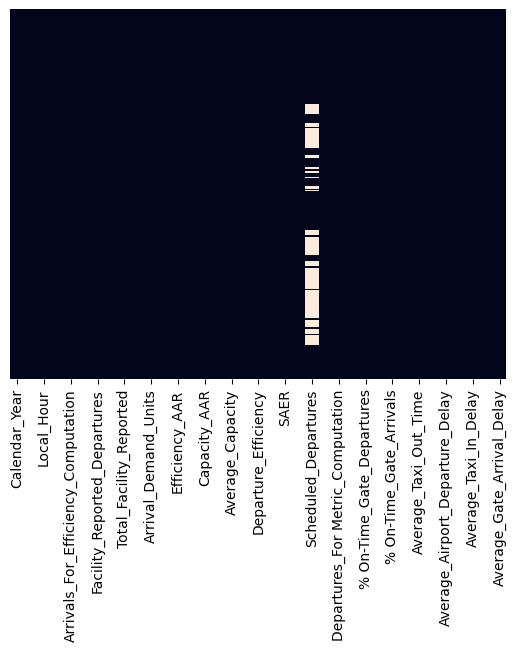

In [ ]:
sns.heatmap(merged_df_2018.isnull(), yticklabels=False, cbar=False)

In [ ]:
merged_df_2018['Scheduled_Arrivals'] = merged_df_2018['Scheduled_Arrivals'].str.replace(',', '').astype(float)
merged_df_2018['Arrivals_For Metric_Computation'] = merged_df_2018['Arrivals_For Metric_Computation'].str.replace(',', '').astype(float)
merged_df_2018['Departures_For Metric_Computation'] = merged_df_2018['Departures_For Metric_Computation'].str.replace(',', '').astype(float)

In [ ]:
merged_df_2018.isnull().sum()

Calendar_Year                              0
Date                                       0
Local_Hour                                 0
Departures_For_Efficiency_Computation      0
Arrivals_For_Efficiency_Computation        0
Total_For_Efficiency_Computation           0
Facility_Reported_Departures               0
Facility_Reported_Arrivals                 0
Total_Facility_Reported                    0
Departure_Demand_Units                     0
Arrival_Demand_Units                       0
Total_Demand_Units                         0
Efficiency_AAR                             0
ADR                                        0
Capacity_AAR                               0
ADR Plus_Capacity_AAR                      0
Average_Capacity                           0
% Capacity_Utilized                        0
Departure_Efficiency                       0
Arrival_Efficiency                         0
SAER                                       0
Hour                                       0
Scheduled_

In [ ]:

merged_df_2023.isnull().sum()

Calendar_Year                              0
Date                                       0
Local_Hour                                 0
Departures_For_Efficiency_Computation      0
Arrivals_For_Efficiency_Computation        0
Total_For_Efficiency_Computation           0
Facility_Reported_Departures               0
Facility_Reported_Arrivals                 0
Total_Facility_Reported                    0
Departure_Demand_Units                     0
Arrival_Demand_Units                       0
Total_Demand_Units                         0
Efficiency_AAR                             0
ADR                                        0
Capacity_AAR                               0
ADR Plus_Capacity_AAR                      0
Average_Capacity                           0
% Capacity_Utilized                        0
Departure_Efficiency                       0
Arrival_Efficiency                         0
SAER                                       0
Hour                                       0
Scheduled_

In [ ]:

print(merged_df_2018.isnull().sum())

merged_df_2018.drop('Scheduled_Departures',axis=1, inplace=True)
merged_df_2023.drop('Scheduled_Departures',axis=1, inplace=True)

Calendar_Year                              0
Date                                       0
Local_Hour                                 0
Departures_For_Efficiency_Computation      0
Arrivals_For_Efficiency_Computation        0
Total_For_Efficiency_Computation           0
Facility_Reported_Departures               0
Facility_Reported_Arrivals                 0
Total_Facility_Reported                    0
Departure_Demand_Units                     0
Arrival_Demand_Units                       0
Total_Demand_Units                         0
Efficiency_AAR                             0
ADR                                        0
Capacity_AAR                               0
ADR Plus_Capacity_AAR                      0
Average_Capacity                           0
% Capacity_Utilized                        0
Departure_Efficiency                       0
Arrival_Efficiency                         0
SAER                                       0
Hour                                       0
Scheduled_

In [ ]:
correlation = merged_df_2018.corr()['Average_Taxi_In_Delay'].sort_values(ascending=False)
correlation

Average_Taxi_In_Delay                    1.000000
Total_Demand_Units                       0.817105
Average_Taxi_Out_Delay                   0.810258
Average_Taxi_Out_Time                    0.802394
Average_Airport_Departure_Delay          0.768602
Arrival_Demand_Units                     0.737726
Departure_Demand_Units                   0.723888
Total_For_Efficiency_Computation         0.721583
% Capacity_Utilized                      0.720354
Departures_For_Efficiency_Computation    0.713680
Departures_For Metric_Computation        0.708329
Facility_Reported_Departures             0.708032
Total_Facility_Reported                  0.702706
Average_Gate_Arrival_Delay               0.688763
Facility_Reported_Arrivals               0.651180
Arrivals_For_Efficiency_Computation      0.644976
Scheduled_Arrivals                       0.629496
Local_Hour                               0.623503
Hour                                     0.623503
Arrivals_For Metric_Computation          0.608934


2018 Dataset Correlation Matrix:


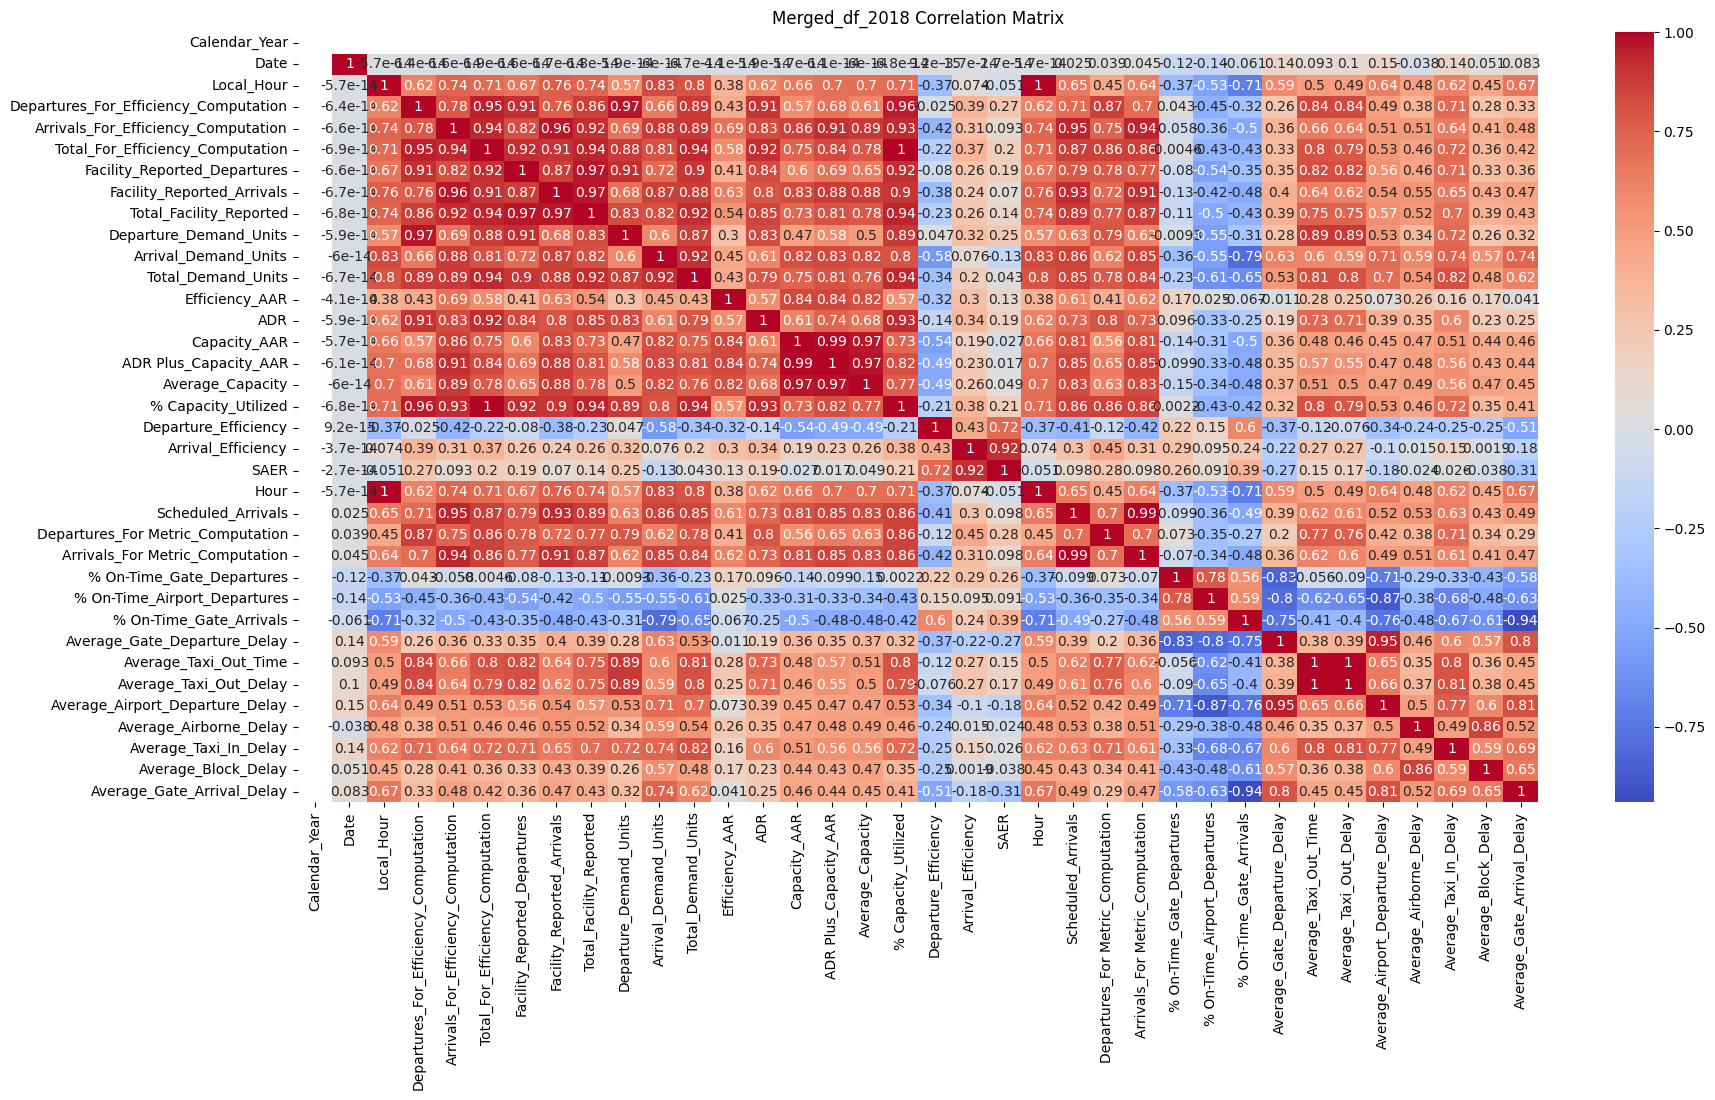

In [ ]:
# Correlation analysis
print("2018 Dataset Correlation Matrix:")
corr_matrix_2018 = merged_df_2018.corr()

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix_2018, annot=True, cmap="coolwarm", ax=ax)
plt.title("Merged_df_2018 Correlation Matrix")
plt.show()


In [ ]:
merged_df = pd.concat([merged_df_2018, merged_df_2023])

#Distribution of Features

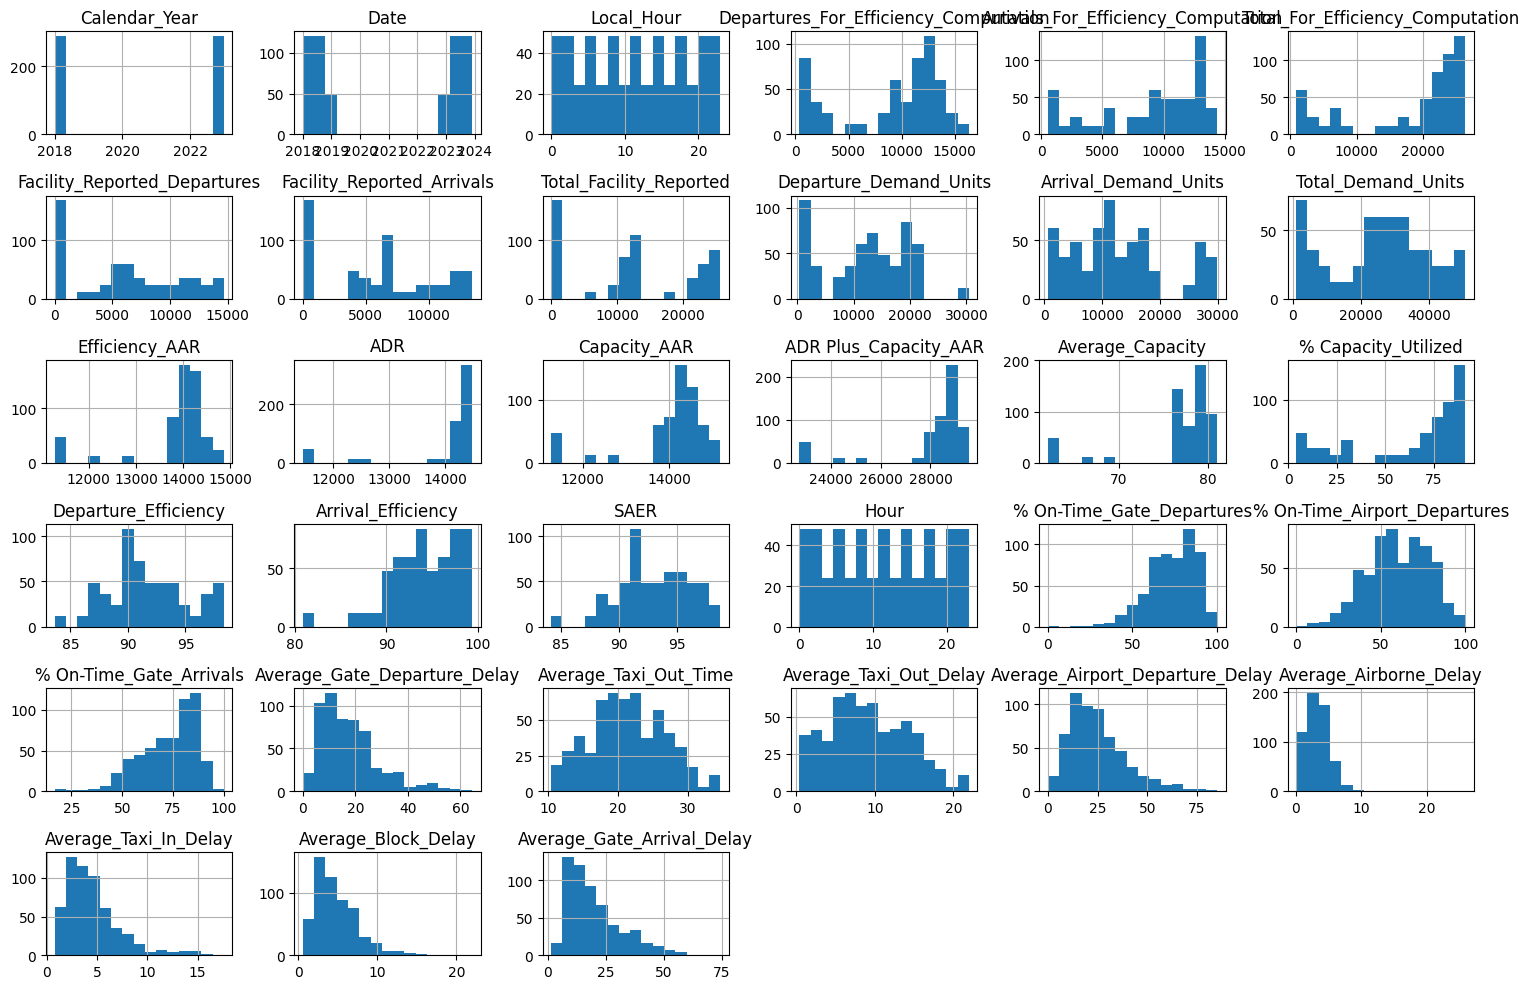

In [ ]:
# Plotting histograms for all numerical data to visualize distributions
merged_df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 0 to 287
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Calendar_Year                          576 non-null    int64         
 1   Date                                   576 non-null    datetime64[ns]
 2   Local_Hour                             576 non-null    int64         
 3   Departures_For_Efficiency_Computation  576 non-null    float64       
 4   Arrivals_For_Efficiency_Computation    576 non-null    float64       
 5   Total_For_Efficiency_Computation       576 non-null    float64       
 6   Facility_Reported_Departures           576 non-null    float64       
 7   Facility_Reported_Arrivals             576 non-null    float64       
 8   Total_Facility_Reported                576 non-null    float64       
 9   Departure_Demand_Units                 576 non-null    float64       


#Scatter Plots for Target Variable Relationships

### Scatter plots of features vs. the target variable 'Average_Taxi_In_Delay'

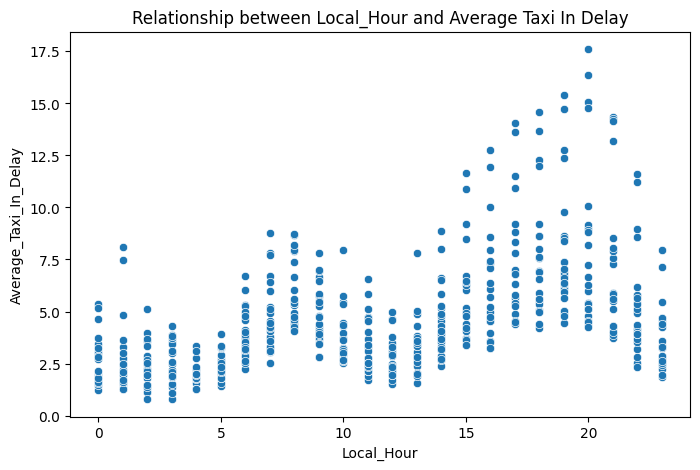

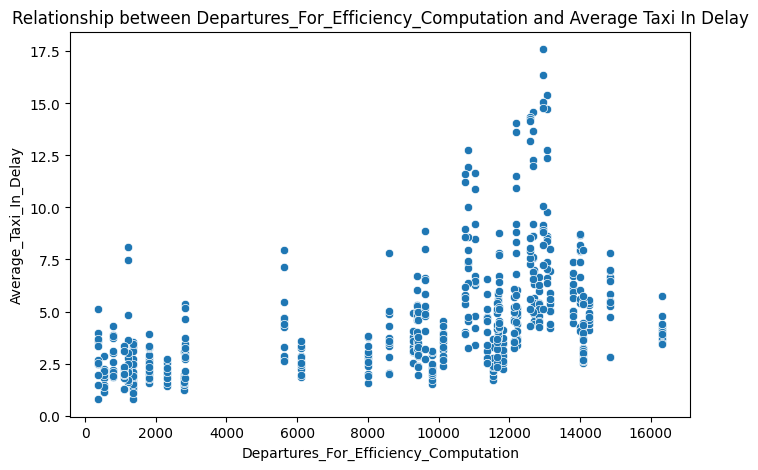

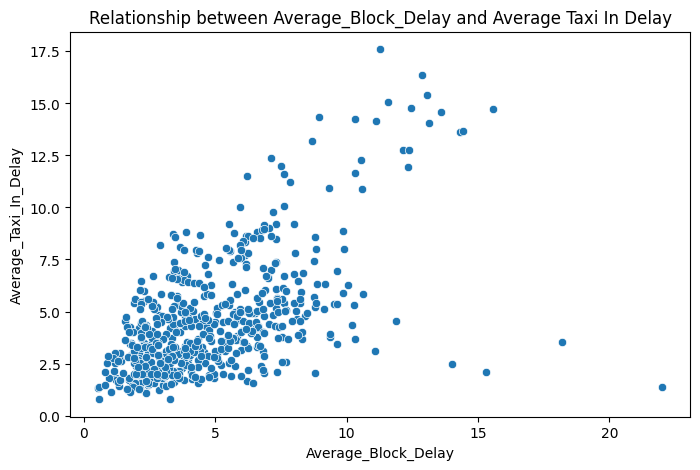

In [ ]:

features = ['Local_Hour', 'Departures_For_Efficiency_Computation', 'Average_Block_Delay']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=merged_df, x=feature, y='Average_Taxi_In_Delay')
    plt.title(f'Relationship between {feature} and Average Taxi In Delay')
    plt.show()


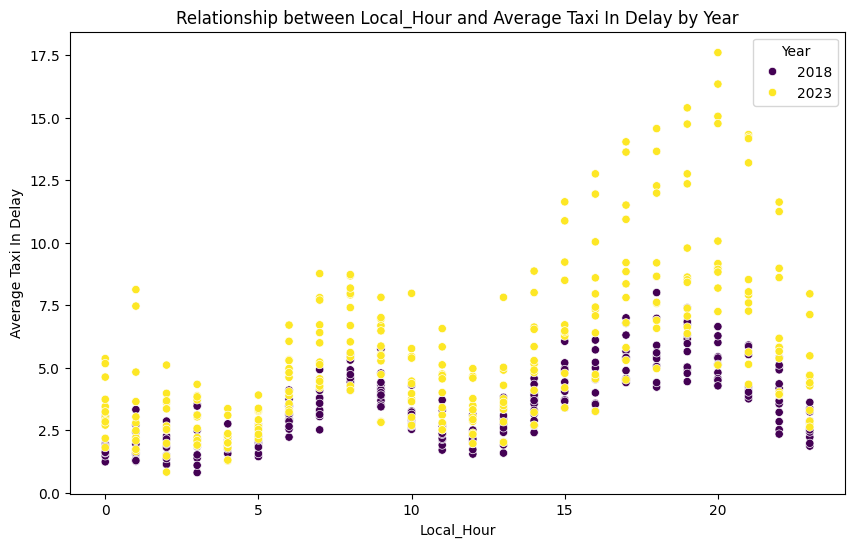

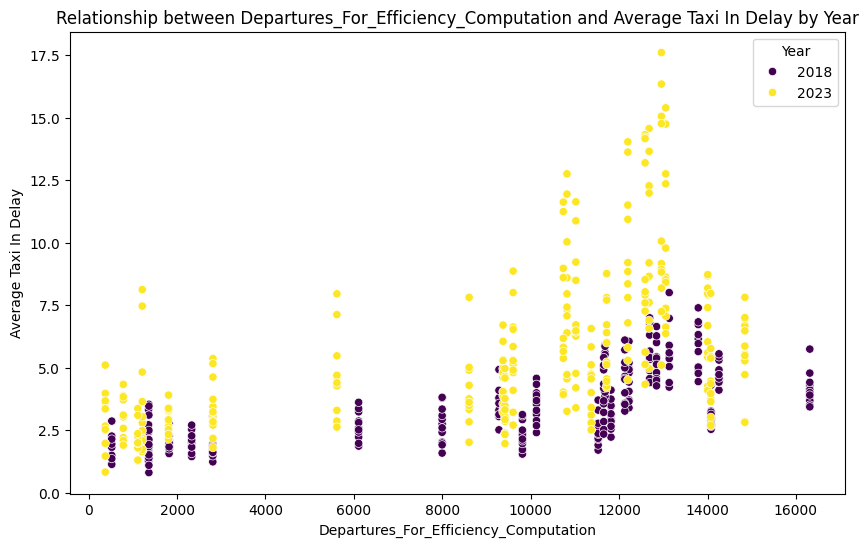

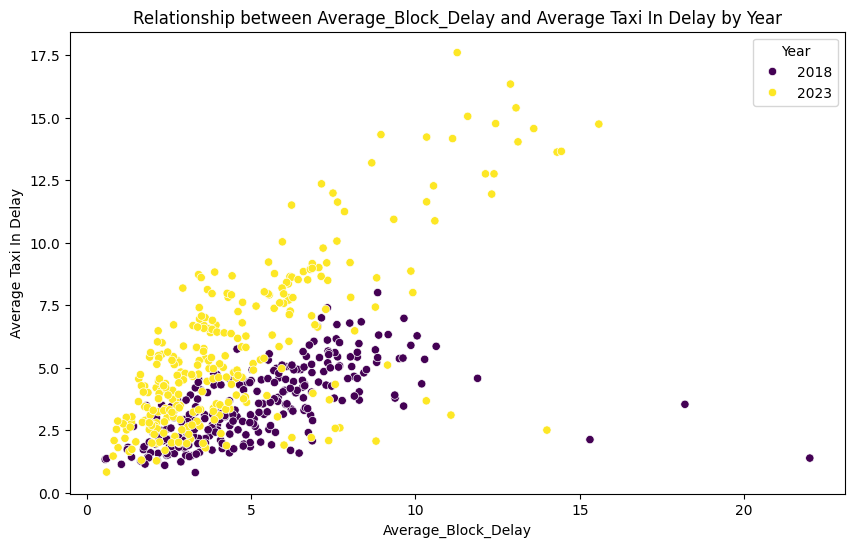

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'merged_df' has a column 'Calendar_Year' and other necessary columns
features = ['Local_Hour', 'Departures_For_Efficiency_Computation', 'Average_Block_Delay']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x=feature, y='Average_Taxi_In_Delay', hue='Calendar_Year', palette='viridis')
    plt.title(f'Relationship between {feature} and Average Taxi In Delay by Year')
    plt.xlabel(feature)
    plt.ylabel('Average Taxi In Delay')
    plt.legend(title='Year')
    plt.show()


1. It appears that the delays in 2023 might be generally higher than in 2018, especially during certain hours.

2. There seems to be a general increase in average taxi in delay as the number of departures for efficiency computation increases. This suggests that higher airport activity in terms of departures could be associated with longer taxi times

data points for 2023 (yellow) generally show higher delays across most levels of departure activity compared to 2018 (purple)

High Activity Peaks: The plot indicates that higher departure activities (beyond 10,000 departures) tend to correspond to higher taxi delays, especially noticeable in 2023. This could be due to congestion or inefficiencies that occur when the airport operates near or at its capacity.

In [ ]:


merged_df['Local_Hour'] = pd.to_numeric(merged_df['Local_Hour'], errors='coerce')
merged_df['Average_Taxi_In_Delay'] = pd.to_numeric(merged_df['Average_Taxi_In_Delay'], errors='coerce')

# Calculate total traffic as the sum of departures and arrivals
merged_df['Total_Traffic'] = merged_df['Departures_For_Efficiency_Computation'] + merged_df['Arrivals_For_Efficiency_Computation']


In [ ]:
# Filter data by year
data_2018 = merged_df[merged_df['Calendar_Year'] == 2018]
data_2023 = merged_df[merged_df['Calendar_Year'] == 2023]



In [ ]:


# Calculate and print the correlation for each year
correlation_2018 = data_2018['Total_Traffic'].corr(data_2018['Average_Taxi_In_Delay'])
correlation_2023 = data_2023['Total_Traffic'].corr(data_2023['Average_Taxi_In_Delay'])
print(f"Correlation between total traffic and taxi-in delay (2018): {correlation_2018}")
print(f"Correlation between total traffic and taxi-in delay (2023): {correlation_2023}")


Correlation between total traffic and taxi-in delay (2018): 0.7215828838123707
Correlation between total traffic and taxi-in delay (2023): 0.5727023793911751


#Feature Engineering- Created features month, dayofweek

In [ ]:
merged_df['Month'] = pd.to_datetime(merged_df['Date']).dt.month
merged_df['DayOfWeek'] = pd.to_datetime(merged_df['Date']).dt.dayofweek



In [ ]:
merged_df.drop('Hour',axis=1, inplace=True)

In [ ]:
merged_df.drop('Date',axis=1, inplace=True)

In [ ]:
merged_df.columns


Index(['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Arrivals_For_Efficiency_Computation',
       'Total_For_Efficiency_Computation', 'Facility_Reported_Departures',
       'Facility_Reported_Arrivals', 'Total_Facility_Reported',
       'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units',
       'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR',
       'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency',
       'Arrival_Efficiency', 'SAER', 'Scheduled_Arrivals',
       'Departures_For Metric_Computation', 'Arrivals_For Metric_Computation',
       '% On-Time_Gate_Departures', '% On-Time_Airport_Departures',
       '% On-Time_Gate_Arrivals', 'Average_Gate_Departure_Delay',
       'Average_Taxi_Out_Time', 'Average_Taxi_Out_Delay',
       'Average_Airport_Departure_Delay', 'Average_Airborne_Delay',
       'Average_Taxi_In_Delay', 'Average_Block_Delay',
       'Average_Gate_Arrival_Delay', 'Total_Traffic', 'Mo

In [ ]:
merged_df

,Calendar_Year,Local_Hour,Departures_For_Efficiency_Computation,Arrivals_For_Efficiency_Computation,Total_For_Efficiency_Computation,Facility_Reported_Departures,Facility_Reported_Arrivals,Total_Facility_Reported,Departure_Demand_Units,Arrival_Demand_Units,...,Average_Taxi_Out_Time,Average_Taxi_Out_Delay,Average_Airport_Departure_Delay,Average_Airborne_Delay,Average_Taxi_In_Delay,Average_Block_Delay,Average_Gate_Arrival_Delay,Total_Traffic,Month,DayOfWeek
0,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,13.43,1.45,12.96,1.51,1.94,2.09,16.99,8331.0,1,0
1,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,14.68,2.58,11.52,2.78,1.61,3.43,14.26,8331.0,2,3
2,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,18.37,6.07,17.20,2.28,1.87,2.75,17.29,8331.0,3,3
3,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,16.12,3.96,14.77,2.47,1.49,2.43,16.96,8331.0,4,6
4,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,16.50,4.32,15.69,1.91,1.23,2.86,18.64,8331.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,18.56,6.26,27.82,1.01,3.29,2.02,23.32,12853.0,8,1
284,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,19.06,7.14,25.60,1.48,4.39,2.80,30.57,12853.0,9,4
285,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,17.26,5.24,23.80,1.13,2.75,1.11,10.85,12853.0,10,6
286,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,16.45,4.08,21.67,1.47,2.86,0.94,9.29,12853.0,11,2


In [ ]:
merged_df.columns

Index(['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Arrivals_For_Efficiency_Computation',
       'Total_For_Efficiency_Computation', 'Facility_Reported_Departures',
       'Facility_Reported_Arrivals', 'Total_Facility_Reported',
       'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units',
       'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR',
       'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency',
       'Arrival_Efficiency', 'SAER', 'Scheduled_Arrivals',
       'Departures_For Metric_Computation', 'Arrivals_For Metric_Computation',
       '% On-Time_Gate_Departures', '% On-Time_Airport_Departures',
       '% On-Time_Gate_Arrivals', 'Average_Gate_Departure_Delay',
       'Average_Taxi_Out_Time', 'Average_Taxi_Out_Delay',
       'Average_Airport_Departure_Delay', 'Average_Airborne_Delay',
       'Average_Taxi_In_Delay', 'Average_Block_Delay',
       'Average_Gate_Arrival_Delay', 'Total_Traffic', 'Mo

In [ ]:
merged_df.dtypes

Calendar_Year                              int64
Local_Hour                                 int64
Departures_For_Efficiency_Computation    float64
Arrivals_For_Efficiency_Computation      float64
Total_For_Efficiency_Computation         float64
Facility_Reported_Departures             float64
Facility_Reported_Arrivals               float64
Total_Facility_Reported                  float64
Departure_Demand_Units                   float64
Arrival_Demand_Units                     float64
Total_Demand_Units                       float64
Efficiency_AAR                           float64
ADR                                      float64
Capacity_AAR                             float64
ADR Plus_Capacity_AAR                    float64
Average_Capacity                         float64
% Capacity_Utilized                      float64
Departure_Efficiency                     float64
Arrival_Efficiency                       float64
SAER                                     float64
Scheduled_Arrivals  

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Identify numerical columns
numerical_columns = ['Calendar_Year', 'Local_Hour',
       'Departures_For_Efficiency_Computation',
       'Arrivals_For_Efficiency_Computation',
       'Total_For_Efficiency_Computation', 'Facility_Reported_Departures',
       'Facility_Reported_Arrivals', 'Total_Facility_Reported',
       'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units',
       'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR',
       'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency',
       'Arrival_Efficiency', 'SAER', 'Scheduled_Arrivals',
       'Departures_For Metric_Computation', 'Arrivals_For Metric_Computation',
       '% On-Time_Gate_Departures', '% On-Time_Airport_Departures',
       '% On-Time_Gate_Arrivals', 'Average_Gate_Departure_Delay',
       'Average_Taxi_Out_Time', 'Average_Taxi_Out_Delay',
       'Average_Airport_Departure_Delay', 'Average_Airborne_Delay',
       'Average_Taxi_In_Delay', 'Average_Block_Delay',
       'Average_Gate_Arrival_Delay', 'Month', 'DayOfWeek']

# Clean numerical columns by removing non-numeric characters and converting to numeric data types
for column in numerical_columns:
    merged_df[column] = pd.to_numeric(merged_df[column].astype(str).str.replace(',', ''), errors='coerce')

# Drop rows with missing values if necessary
merged_df.dropna(subset=numerical_columns, inplace=True)


# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling
merged_df_min_max_scaled = min_max_scaler.fit_transform(merged_df[numerical_columns])

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(merged_df_min_max_scaled, columns=numerical_columns)




In [ ]:
merged_df

,Calendar_Year,Local_Hour,Departures_For_Efficiency_Computation,Arrivals_For_Efficiency_Computation,Total_For_Efficiency_Computation,Facility_Reported_Departures,Facility_Reported_Arrivals,Total_Facility_Reported,Departure_Demand_Units,Arrival_Demand_Units,...,Average_Taxi_Out_Time,Average_Taxi_Out_Delay,Average_Airport_Departure_Delay,Average_Airborne_Delay,Average_Taxi_In_Delay,Average_Block_Delay,Average_Gate_Arrival_Delay,Total_Traffic,Month,DayOfWeek
0,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,13.43,1.45,12.96,1.51,1.94,2.09,16.99,8331.0,1,0
1,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,14.68,2.58,11.52,2.78,1.61,3.43,14.26,8331.0,2,3
2,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,18.37,6.07,17.20,2.28,1.87,2.75,17.29,8331.0,3,3
3,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,16.12,3.96,14.77,2.47,1.49,2.43,16.96,8331.0,4,6
4,2018,0,2810.0,5521.0,8331.0,0.0,0.0,0.0,3348.0,8028.0,...,16.50,4.32,15.69,1.91,1.23,2.86,18.64,8331.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,18.56,6.26,27.82,1.01,3.29,2.02,23.32,12853.0,8,1
284,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,19.06,7.14,25.60,1.48,4.39,2.80,30.57,12853.0,9,4
285,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,17.26,5.24,23.80,1.13,2.75,1.11,10.85,12853.0,10,6
286,2023,23,5617.0,7236.0,12853.0,5427.0,6926.0,12353.0,6982.0,8721.0,...,16.45,4.08,21.67,1.47,2.86,0.94,9.29,12853.0,11,2


In [ ]:
merged_df_min_max_scaled

array([[0.        , 0.        , 0.15266361, ..., 0.21320213, 0.        ,
        0.        ],
       [0.        , 0.        , 0.15266361, ..., 0.17589176, 0.09090909,
        0.5       ],
       [0.        , 0.        , 0.15266361, ..., 0.21730217, 0.18181818,
        0.5       ],
       ...,
       [1.        , 1.        , 0.32879463, ..., 0.12928796, 0.81818182,
        1.        ],
       [1.        , 1.        , 0.32879463, ..., 0.10796775, 0.90909091,
        0.33333333],
       [1.        , 1.        , 0.32879463, ..., 0.17548175, 1.        ,
        0.66666667]])

In [ ]:


# Assuming you only need the first 32 or the correct set of columns
scaled_df = pd.DataFrame(merged_df_min_max_scaled, columns=numerical_columns)


In [ ]:
scaled_df.columns

Index(['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Arrivals_For_Efficiency_Computation',
       'Total_For_Efficiency_Computation', 'Facility_Reported_Departures',
       'Facility_Reported_Arrivals', 'Total_Facility_Reported',
       'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units',
       'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR',
       'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency',
       'Arrival_Efficiency', 'SAER', 'Scheduled_Arrivals',
       'Departures_For Metric_Computation', 'Arrivals_For Metric_Computation',
       '% On-Time_Gate_Departures', '% On-Time_Airport_Departures',
       '% On-Time_Gate_Arrivals', 'Average_Gate_Departure_Delay',
       'Average_Taxi_Out_Time', 'Average_Taxi_Out_Delay',
       'Average_Airport_Departure_Delay', 'Average_Airborne_Delay',
       'Average_Taxi_In_Delay', 'Average_Block_Delay',
       'Average_Gate_Arrival_Delay', 'Month', 'DayOfWeek'

In [ ]:
# Check for missing values
missing_values = scaled_df.isnull().sum()

print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Impute missing values with mean for numerical columns
numerical_columns = scaled_df.select_dtypes(include='number').columns
scaled_df[numerical_columns] = scaled_df[numerical_columns].fillna(scaled_df[numerical_columns].mean())

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(scaled_df.isnull().sum().sum())


Columns with missing values:
Series([], dtype: int64)

Missing values after handling:
0


#Multicollinearity

In [ ]:

columns = ['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Arrivals_For_Efficiency_Computation',
       'Total_For_Efficiency_Computation', 'Facility_Reported_Departures',
       'Facility_Reported_Arrivals', 'Total_Facility_Reported',
       'Departure_Demand_Units', 'Arrival_Demand_Units', 'Total_Demand_Units',
       'Efficiency_AAR', 'ADR', 'Capacity_AAR', 'ADR Plus_Capacity_AAR',
       'Average_Capacity', '% Capacity_Utilized', 'Departure_Efficiency',
       'Arrival_Efficiency', 'SAER', 'Scheduled_Arrivals',
       'Departures_For Metric_Computation', 'Arrivals_For Metric_Computation',
       '% On-Time_Gate_Departures', '% On-Time_Airport_Departures',
       '% On-Time_Gate_Arrivals', 'Average_Gate_Departure_Delay',
       'Average_Taxi_Out_Time', 'Average_Taxi_Out_Delay',
       'Average_Airport_Departure_Delay', 'Average_Airborne_Delay',
       'Average_Taxi_In_Delay', 'Average_Block_Delay',
       'Average_Gate_Arrival_Delay', 'Month', 'DayOfWeek']

df_new = scaled_df[columns]
corr_matrix = scaled_df.corr().abs()

# Creating mask to find highly correlated features
high_corr_mask = corr_matrix > 0.8

# Finding pairs of highly correlated features
correlated_features = set()
for i in range(len(high_corr_mask.columns)):
    for j in range(i):
        if high_corr_mask.iloc[i, j]:
            correlated_features.add(high_corr_mask.columns[i])



In [ ]:
df_corr = scaled_df.drop(columns=correlated_features)

In [ ]:
df_corr.columns

Index(['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Facility_Reported_Departures', 'Efficiency_AAR',
       'Departure_Efficiency', 'Arrival_Efficiency',
       '% On-Time_Gate_Departures', '% On-Time_Gate_Arrivals',
       'Average_Airborne_Delay', 'Average_Taxi_In_Delay',
       'Average_Block_Delay', 'Month', 'DayOfWeek'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming 'merged_df' is your main DataFrame and 'Average_Taxi_In_Delay' is your target variable
correlation = df_corr.corr()
target_correlation = correlation['Average_Taxi_In_Delay'].abs()  # Use abs to consider both negative and positive correlations

# Display correlations with the target
print(target_correlation.sort_values())

# Threshold for removing features, e.g., features with correlation less than 0.1
low_correlation_features = target_correlation[target_correlation < 0.3].index.tolist()
print(f"Low correlation features: {low_correlation_features}")

# Drop these features
reduced1_df = df_corr.drop(columns=low_correlation_features)

DayOfWeek                                0.024160
Arrival_Efficiency                       0.102509
Month                                    0.108291
Efficiency_AAR                           0.243431
Average_Airborne_Delay                   0.261973
Departure_Efficiency                     0.327778
% On-Time_Gate_Arrivals                  0.366078
% On-Time_Gate_Departures                0.375685
Calendar_Year                            0.403480
Local_Hour                               0.501462
Departures_For_Efficiency_Computation    0.505706
Average_Block_Delay                      0.576935
Facility_Reported_Departures             0.651828
Average_Taxi_In_Delay                    1.000000
Name: Average_Taxi_In_Delay, dtype: float64
Low correlation features: ['Efficiency_AAR', 'Arrival_Efficiency', 'Average_Airborne_Delay', 'Month', 'DayOfWeek']


In [ ]:
reduced1_df.columns

Index(['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Facility_Reported_Departures', 'Departure_Efficiency',
       '% On-Time_Gate_Departures', '% On-Time_Gate_Arrivals',
       'Average_Taxi_In_Delay', 'Average_Block_Delay'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split


# Independent variables (features)
X = reduced1_df[['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Facility_Reported_Departures', 'Departure_Efficiency',
       '% On-Time_Gate_Departures', '% On-Time_Gate_Arrivals','Average_Block_Delay']]

# Dependent variable
y = reduced1_df['Average_Taxi_In_Delay']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [ ]:
import statsmodels.api as sm

# Assuming X_train is your predictors DataFrame and y_train is the target variable
X_train_with_const = sm.add_constant(X_train)  # adding a constant

model = sm.OLS(y_train, X_train_with_const).fit()
print(model.summary())

# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print(vif_data)


                              OLS Regression Results                             
Dep. Variable:     Average_Taxi_In_Delay   R-squared:                       0.740
Model:                               OLS   Adj. R-squared:                  0.735
Method:                    Least Squares   F-statistic:                     160.3
Date:                   Mon, 13 May 2024   Prob (F-statistic):          1.14e-126
Time:                           16:36:39   Log-Likelihood:                 479.52
No. Observations:                    460   AIC:                            -941.0
Df Residuals:                        451   BIC:                            -903.9
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

#Model Preparation and Evaluation

##1. Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X = reduced1_df[['Calendar_Year', 'Local_Hour', 'Departures_For_Efficiency_Computation',
       'Facility_Reported_Departures', 'Departure_Efficiency',
       '% On-Time_Gate_Departures', '% On-Time_Gate_Arrivals','Average_Block_Delay']]

# Dependent variable
y = reduced1_df['Average_Taxi_In_Delay']


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_aic = len(X_train) * np.log(mean_squared_error(y_test, linear_model.predict(X_test))) + 2 * (X_train.shape[1] + 1)
linear_bic = len(X_train) * np.log(mean_squared_error(y_test, linear_model.predict(X_test))) + (X_train.shape[1] + 1) * np.log(len(X_train))

# Predict the taxi-in delay for the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean absolute Error:", mae)

print("Linear Regression:")
print("AIC:", linear_aic)
print("BIC:", linear_bic)




Mean Squared Error: 0.005121846350212255
R-squared: 0.7671501702710437
Root Mean Squared Error: 0.07156707588138735
Mean absolute Error: 0.054745137979630674
Linear Regression:
AIC: -2408.150533244037
BIC: -2370.9694948386887


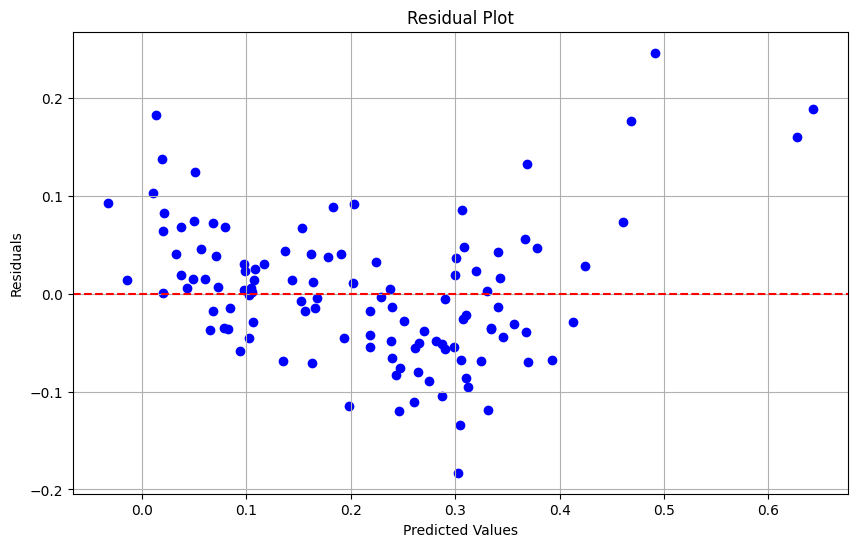

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
# Predict the taxi-in delay for the training set
y_train_pred = linear_model.predict(X_train)

# Evaluate the model on training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

print("Training Set Scores:")
print("Mean Squared Error:", train_mse)
print("R-squared:", train_r2)
print("Root Mean Squared Error:", train_rmse)
print("Mean Absolute Error:", train_mae)

Training Set Scores:
Mean Squared Error: 0.007279021379352805
R-squared: 0.7397937883953383
Root Mean Squared Error: 0.08531718103261972
Mean Absolute Error: 0.06279036667547055


##2. Lasso and Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the pipeline for Ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the pipeline for Lasso regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define the parameter grid for Ridge regression
ridge_param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10]  # Regularization parameter values to try
}

# Define the parameter grid for Lasso regression
lasso_param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10]  # Regularization parameter values to try
}


ridge_grid_search = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)


lasso_grid_search = GridSearchCV(lasso_pipeline, param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Get best hyperparameters and best models
best_ridge_params = ridge_grid_search.best_params_
best_ridge_model = ridge_grid_search.best_estimator_

best_lasso_params = lasso_grid_search.best_params_
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate Ridge regression model
ridge_y_pred = best_ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

# Evaluate Lasso regression model
lasso_y_pred = best_lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

lasso_aic = len(X_train) * np.log(mean_squared_error(y_test, lasso_grid_search.predict(X_test))) + 2 * (X_train.shape[1] + 1)
lasso_bic = len(X_train) * np.log(mean_squared_error(y_test, lasso_grid_search.predict(X_test))) + (X_train.shape[1] + 1) * np.log(len(X_train))

ridge_aic = len(X_train) * np.log(mean_squared_error(y_test, ridge_grid_search.predict(X_test))) + 2 * (X_train.shape[1] + 1)
ridge_bic = len(X_train) * np.log(mean_squared_error(y_test, ridge_grid_search.predict(X_test))) + (X_train.shape[1] + 1) * np.log(len(X_train))


print("Ridge Regression:")
print("Best Parameters:", best_ridge_params)
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

print("\nLasso Regression:")
print("Best Parameters:", best_lasso_params)
print("Mean Squared Error:", lasso_mse)
print("R-squared:", lasso_r2)

print("AIC:", lasso_aic)
print("BIC:", lasso_bic)
print("\nRidge Regression:")
print("AIC:", ridge_aic)
print("BIC:", ridge_bic)


Ridge Regression:
Best Parameters: {'ridge__alpha': 10}
Mean Squared Error: 0.0050863280075433915
R-squared: 0.7687649082926864

Lasso Regression:
Best Parameters: {'lasso__alpha': 0.01}
Mean Squared Error: 0.005796807914117486
R-squared: 0.7364650082254447
AIC: -2351.2060213813415
BIC: -2314.024982975993

Ridge Regression:
AIC: -2411.35159603703
BIC: -2374.1705576316817


In [ ]:
# Compute MAE and RMSE for Ridge regression
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)

# Compute MAE and RMSE for Lasso regression
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)

print("\nRidge Regression:")
print("MAE:", ridge_mae)
print("RMSE:", ridge_rmse)

print("\nLasso Regression:")
print("MAE:", lasso_mae)
print("RMSE:", lasso_rmse)



Ridge Regression:
MAE: 0.05435813045589572
RMSE: 0.07131849695235726

Lasso Regression:
MAE: 0.05772517559684662
RMSE: 0.07613677110383317


##3. Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict the taxi-in delay for the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the Random Forest model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
rf_aic = len(X_train) * np.log(mean_squared_error(y_test, forest_model.predict(X_test))) + 2 * (X_train.shape[1] + 1)
rf_bic = len(X_train) * np.log(mean_squared_error(y_test, forest_model.predict(X_test))) + (X_train.shape[1] + 1) * np.log(len(X_train))

# Print AIC and BIC for Random Forest
print("Random Forest:")
print("AIC:", rf_aic)
print("BIC:", rf_bic)

print("Random Forest Model Evaluation:")
print("Mean Squared Error:", mse_forest)
print("R-squared:", r2_forest)
print("Root Mean Squared Error:", rmse_forest)
print("Mean Absolute Error:", mae_forest)


Random Forest:
AIC: -2796.444098893377
BIC: -2759.2630604880287
Random Forest Model Evaluation:
Mean Squared Error: 0.0022020715748763578
R-squared: 0.8998892281804421
Root Mean Squared Error: 0.04692623546457096
Mean Absolute Error: 0.037501488095238074


In [ ]:
# Predict on the training set
y_train_pred_forest = forest_model.predict(X_train)

# Evaluate the Random Forest model on the training set
mse_train_forest = mean_squared_error(y_train, y_train_pred_forest)
r2_train_forest = r2_score(y_train, y_train_pred_forest)
mae_train_forest = mean_absolute_error(y_train, y_train_pred_forest)
rmse_train_forest = np.sqrt(mse_train_forest)

print("Random Forest Model Training Scores:")
print("Mean Squared Error:", mse_train_forest)
print("R-squared:", r2_train_forest)
print("Root Mean Squared Error:", rmse_train_forest)
print("Mean Absolute Error:", mae_train_forest)

Random Forest Model Training Scores:
Mean Squared Error: 0.0005005479028024267
R-squared: 0.9821067054584667
Root Mean Squared Error: 0.022372927899638587
Mean Absolute Error: 0.01591410455486544


##4. XGBoost

In [ ]:
import xgboost as xgb

# Initialize and train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

xgb_aic = len(X_train) * np.log(mean_squared_error(y_test, xgb_model.predict(X_test))) + 2 * (X_train.shape[1] + 1)
xgb_bic = len(X_train) * np.log(mean_squared_error(y_test, xgb_model.predict(X_test))) + (X_train.shape[1] + 1) * np.log(len(X_train))


print("\nXGBoost Results:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)
print("Mean Absolute Error:", mae_xgb)




XGBoost Results:
Mean Squared Error: 0.0022912643486368276
R-squared: 0.8958343384467198
Mean Absolute Error: 0.03825747274070341


In [ ]:
print("\nXGBoost:")
print("AIC:", xgb_aic)
print("BIC:", xgb_bic)


XGBoost:
AIC: -2778.179688375286
BIC: -2740.9986499699376


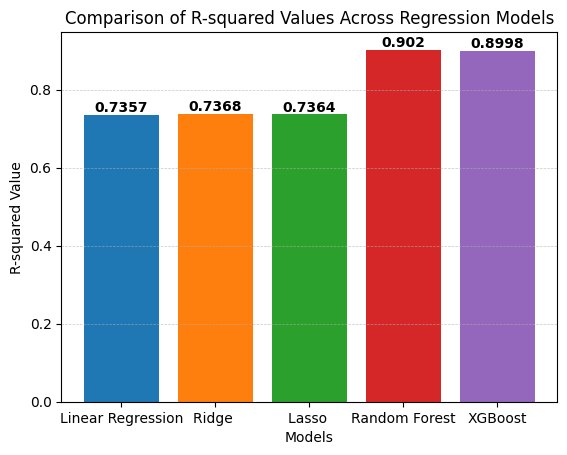

In [ ]:
  import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Ridge ', 'Lasso ', 'Random Forest', 'XGBoost']

# R-squared values for each model
r_squared = [0.7357, 0.7368, 0.7364, 0.9020, 0.8998]

# Colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots()

# Create bars
bars = plt.bar(models, r_squared, color=colors)

# Add title and labels
plt.title('Comparison of R-squared Values Across Regression Models')
plt.xlabel('Models')
plt.ylabel('R-squared Value')

# Adding the text labels on the bars
for bar, value in zip(bars, r_squared):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(value, 4), ha='center', va='bottom', fontweight='bold')

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)

# Show the plot
plt.show()
